import os
os.chdir("/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-29/00-52-56")

['/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_0/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_229/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_465/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_702/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_940/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_1176/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_1411/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_1642/generated.csv',
 '/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0/train_1869/generated.csv',

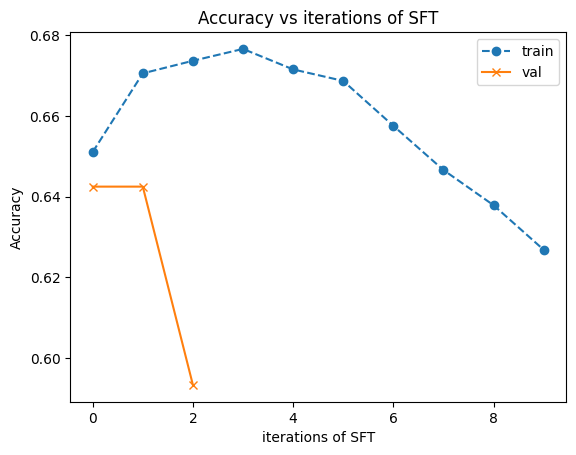

comparing index 0 and index 1
len(indices_where_a_not_eq_b)=2463
len(indices_where_both_wrong)=2579 len(indices_where_a_is_right_b_is_wrong)=1122 len(indices_where_b_is_right_a_is_wrong)=1341 len(indices_where_a_not_eq_b)=2463
len(set(indices_where_both_wrong+indices_where_a_is_right_b_is_wrong+indices_where_b_is_right_a_is_wrong+indices_where_a_not_eq_b))=5042
number 0 of 2463
SUBJECT: us_foreign_policy
CORRECT ANSWER: C
MODEL ANSWERS: ex0: A, ex1: C
QUESTION: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following multiple choice question. The last line of your response should be of the following format: 'Answer: $LETTER' (without quotes) where LETTER is one of ABCD. Think step by step before answering.

In general, how do conservatives and liberals differ when it comes to defense spending?

A) Conservatives are skeptical of increases in defense spending; liberals advocate increas

In [6]:
# import pandas as pd

# exploring the datasets collected with ipywidgets
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, Layout
from IPython.display import display, HTML, display_pretty
import glob
from pprint import pprint
import os
import numpy as np
from tqdm import tqdm
from star.agent.agent import GeneratedSamples

def interactive_function(output_dir: str, index_a, index_b):
    get_iteration = lambda name : int(name.split("_")[-1].split("/")[0])
    train_files = sorted(glob.glob(os.path.join(output_dir, "train_*/generated.csv")), key=get_iteration)
    val_files = sorted(glob.glob(os.path.join(output_dir, "val_*/generated.csv")), key=get_iteration)
    pprint(train_files)
    filtered_iterations = set(get_iteration(file) for file in train_files)
    val_files = [val_files[0]] + [val_file for val_file in val_files if (get_iteration(val_file) + 0) in filtered_iterations] + [val_files[-1]]
    pprint(val_files)

    def get_dfs(files):
        df_generated_samples_per_file = {
            file: pd.read_csv(file, index_col=0)
                for file in files
        }
        return df_generated_samples_per_file
    def get_gen_samples(files):
        gen_samples_per_file = dict()
        df_generated_samples_per_file = get_dfs(files)
        for file, df in df_generated_samples_per_file.items():
            gen_samples_per_file[file] = GeneratedSamples(**df.to_dict("list"))
        return gen_samples_per_file
    def get_step_accs(generated_samples_per_file):
        acc = lambda it: sum(it) / len(it)
        steps = []
        accs = []
        for file, gen_samples in generated_samples_per_file.items():
            step_i = int(file.split('_')[-1].split("/")[0])
            acc_i = acc(gen_samples.scores)

            steps.append(step_i)
            accs.append(acc_i)
        steps, accs = list(zip(*sorted(list(zip(steps, accs)))))
        steps = list(range(len(steps))) # relabeling from gradient steps to star iterations
        return steps, accs
    train_gen_samples_per_file = get_gen_samples(train_files)
    val_gen_samples_per_file = get_gen_samples(val_files)
    plt.plot(*get_step_accs(train_gen_samples_per_file), linestyle='--', marker='o', label="train")
    plt.plot(*get_step_accs(val_gen_samples_per_file), linestyle='-', marker='x', label="val")
    plt.title("Accuracy vs iterations of SFT")
    plt.xlabel("iterations of SFT")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    if len(train_files) <= index_a or len(train_files) <= index_b:
        print(f"invalid indices given for len {len(train_files)}")
        return
    print(f"comparing index {index_a} and index {index_b}")
    gen_samples_a: GeneratedSamples = list(train_gen_samples_per_file.values())[index_a]
    gen_samples_b: GeneratedSamples = list(train_gen_samples_per_file.values())[index_b]
    
    # import ipdb; ipdb.set_trace()
    # find the interesting points
    # print(f"{len(gen_samples_a.correct_answers)=}  {len(gen_samples_b.correct_answers)=}")
    # assert len(gen_samples_a.correct_answers) == len(gen_samples_b.correct_answers)
    # I can simply sort the 
    indices_where_a_not_eq_b = [i for i in range(len(gen_samples_a.correct_answers)) if (gen_samples_a.scores[i] != gen_samples_b.scores[i])]
    indices_where_both_wrong = [i for i in range(len(gen_samples_a.correct_answers)) if (gen_samples_a.scores[i] != 1.0 and gen_samples_b.scores[i] != 1.0)]
    indices_where_a_is_right_b_is_wrong = [i for i in range(len(gen_samples_a.correct_answers)) if (gen_samples_a.scores[i] == 1.0 and gen_samples_b.scores[i] != 1.0)]
    indices_where_b_is_right_a_is_wrong = [i for i in range(len(gen_samples_a.correct_answers)) if (gen_samples_a.scores[i] != 1.0 and gen_samples_b.scores[i] == 1.0)]
    print(f"{len(indices_where_a_not_eq_b)=}")
    train_dfs_per_file = list(get_dfs(train_files).values())
    train_df_a = train_dfs_per_file[index_a]
    train_df_b = train_dfs_per_file[index_b]
    print(f"{len(indices_where_both_wrong)=} {len(indices_where_a_is_right_b_is_wrong)=} {len(indices_where_b_is_right_a_is_wrong)=} {len(indices_where_a_not_eq_b)=}")
    print(f"{len(set(indices_where_both_wrong+indices_where_a_is_right_b_is_wrong+indices_where_b_is_right_a_is_wrong+indices_where_a_not_eq_b))=}")
    for iteration, index in enumerate(indices_where_a_not_eq_b):
        print(f"number {iteration} of {len(indices_where_a_not_eq_b)}")
        example_a = train_df_a.iloc[index].to_dict()
        example_b = train_df_b.iloc[index].to_dict()
        assert example_a['prompted_questions'] == example_b['prompted_questions'] and example_a['correct_answers'] == example_b['correct_answers']
        print(f"SUBJECT: {example_a['subjects']}")
        print(f"CORRECT ANSWER: {example_a['correct_answers']}")
        print(f"MODEL ANSWERS: ex{index_a}: {example_a['model_answers']}, ex{index_b}: {example_b['model_answers']}")
        print(f"QUESTION: {example_a['prompted_questions']}")
        print(f"example {index_a} {'*'*100}")
        pprint(example_a["raw_responses"])
        print(f"example {index_b} {'*'*100}")
        pprint(example_b["raw_responses"])
        break


    
output_dirs=sorted(glob.glob("/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/*/*"))[:-12:-1]
# pprint(output_dirs)
output_dir = "/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-30/00-12-18_0"
# output_dir = "/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/train_2024-10-01/03-06-34_0"
# output_dir = "/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/train_translate_2024-10-02/04-20-40_0"
interactive_function(output_dir, 0, 1)
# get_val_and_test_plot("/nethome/jbjorner3/dev/hallucination-fun/star/star_runs/None_2024-09-29/02-34-02")

In [1]:
import torch
from unsloth import FastLanguageModel
from pprint import pprint
max_seq_length = 2048
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B-Instruct",
    max_seq_length = max_seq_length,
    dtype = torch.bfloat16,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.9.post4: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A40. Max memory: 44.385 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


In [2]:
model2, tokenizer2 = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-Instruct",
    max_seq_length = max_seq_length,
    dtype = torch.bfloat16,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

==((====))==  Unsloth 2024.9.post4: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A40. Max memory: 44.385 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


In [3]:
model2 = FastLanguageModel.for_inference(model2)
torch.set_grad_enabled(False)
with torch.no_grad(): # looking for lowest perplexity decoding. do something on your own in terms of replicating beam search or replicating MCTS, don't want to have all beams degenerate, we should enforce exploration...
    # sample for first 10 tokens, and then perform greedy rollout from there? (or even beam search from there?)
    output = model2.generate(**tokenizer(["print forever "] * 3, return_tensors='pt'), max_new_tokens=20, use_cache=True, do_sample=True)

In [4]:
pprint(tokenizer.batch_decode(output.tolist(), skip_special_tokens=False))

['<|begin_of_text|>print forever 2023\n'
 '\n'
 '**Forever in 2023: A Year of Endless Possibilities**\n'
 '\n'
 'As we',
 '<|begin_of_text|>print forever 2023\n'
 'Forever is a popular annual print magazine that has been published since '
 '2001. It',
 '<|begin_of_text|>print forever 2019\n'
 'Print Forever is a 2019 American science fiction comedy film directed by '
 'David Robert Mitchell']


In [27]:
with torch.no_grad():
    output = model2.generate(input_ids=output, max_new_tokens=20, use_cache=True, do_sample=False)

In [28]:
pprint(tokenizer.batch_decode(output.tolist(), skip_special_tokens=False))

['<|begin_of_text|>print forever 2022\n'
 'Print Forever is a 2022 documentary film directed by Michael McFarland. The '
 'film explores the concept of time and the human experience through the lens '
 'of a group of people who are',
 '<|begin_of_text|>print forever 1\n'
 '================\n'
 '\n'
 'A simple Python program that prints "Forever 1" indefinitely.\n'
 '\n'
 '**Code**\n'
 '```python\n'
 'while True:\n'
 '    print("Forever 1")\n'
 '```\n'
 '**Explanation**\n'
 '\n'
 'This program',
 '<|begin_of_text|>print forever 2022\n'
 'Forever 2022 is a digital art exhibition that celebrates the intersection of '
 'technology and art. The exhibition features a wide range of digital art '
 'pieces, including paintings, sculptures, and installations,']


In [30]:
o = model(output)
# o.logits.shape, output.shape #[output]
# o.logits[output[...,None]]# .shape
# output.max()
# p.logits.shape # torch.arange(output.shape[0])[:,None,None], torch.arange(output.shape[1])[None, :, None]
token_scores = o.logits.log_softmax(dim=-1)
torch.gather(token_scores, dim=2, index=output[...,None]).flatten(1).sum(dim=-1)

tensor([-524., -756., -604.], dtype=torch.bfloat16)

In [29]:
model2 = FastLanguageModel.for_inference(model2)
o = model2(output)
# o.logits.shape, output.shape #[output]
# o.logits[output[...,None]]# .shape
# output.max()
# p.logits.shape # torch.arange(output.shape[0])[:,None,None], torch.arange(output.shape[1])[None, :, None]
token_scores = o.logits.log_softmax(dim=-1)
torch.gather(token_scores, dim=2, index=output[...,None]).flatten(1).sum(dim=-1)

tensor([-548., -732., -596.], dtype=torch.bfloat16)

In [74]:
o.logits.log_softmax(dim=-1)# [0,0].exp().sum()

tensor([[[-12.9375, -10.4375,  -5.5938,  ..., -14.5000, -14.5000, -14.5000],
         [-13.6875,  -8.2500, -12.6250,  ..., -19.0000, -19.0000, -19.0000],
         [ -5.0312,  -7.6875, -10.8750,  ..., -20.8750, -20.8750, -20.8750],
         ...,
         [-14.1250, -16.1250, -19.1250,  ..., -21.7500, -21.7500, -21.7500],
         [-28.1250, -30.0000, -26.0000,  ..., -27.0000, -27.0000, -27.0000],
         [-21.0000, -20.5000, -22.6250,  ..., -28.5000, -28.5000, -28.5000]],

        [[-12.9375, -10.4375,  -5.5938,  ..., -14.5000, -14.5000, -14.5000],
         [-13.6875,  -8.2500, -12.6250,  ..., -19.0000, -19.0000, -19.0000],
         [ -5.0312,  -7.6875, -10.8750,  ..., -20.8750, -20.8750, -20.8750],
         ...,
         [-14.4375, -14.6875, -15.9375,  ..., -21.2500, -21.2500, -21.2500],
         [-14.7500, -16.2500, -15.8125,  ..., -20.7500, -20.7500, -20.7500],
         [-10.5000, -14.9375, -14.5625,  ..., -21.2500, -21.2500, -21.2500]],

        [[-12.9375, -10.4375,  -5.5938,  ...

In [21]:
pprint(tokenizer.batch_decode(output.tolist()))

['<|begin_of_text|>print forever 2020\n'
 'Print Forever is a limited edition publication of 20 prints by 20 artists, '
 'each',
 '<|begin_of_text|>print forever 2024\n'
 'The 2024 print forever stamp features a colorful image of a monarch '
 'butterfly. The',
 '<|begin_of_text|>print forever 3d printing\n'
 'The Benefits of 3D Printing\n'
 '3D printing, also known as additive']


In [24]:
# with torch.no_grad():
#     output_3 = model.generate(**tokenizer(["print forever "] * 3, return_tensors='pt'), use_cache=False, num_beams=5, num_beam_groups=5, max_new_tokens=30, diversity_penalty=1.0, do_sample=False)

RuntimeError: The size of tensor a (32) must match the size of tensor b (75) at non-singleton dimension 1

In [1]:
len(tokenizer("print forever " * 1000).input_ids)

NameError: name 'tokenizer' is not defined

In [17]:
from star.dataset.dataset import get_train_val_test_dataset
train, _, _ = get_train_val_test_dataset("mmlu_YO-NG")

In [22]:
max([(len(tokenizer(t["Question"]).input_ids), i) for i, t in enumerate(train)])

(3139, 4550)

In [1]:
# need to know how to train a simple torch model????
# want to be able to replicate star... 
# They use a 6 Billion parameter sized model, 
# so maybe I start with just tuning a llama 7.1 billion instruct? 
# The model that star works off of is a pretrained one no finetuning
from datasets import load_dataset, DatasetDict
from torch.utils.data import DataLoader, Dataset
import torch
from typing import List, Dict, Any
import numpy as np
from tqdm import tqdm
import torch
import re
from dataclasses import dataclass
from torch.nn.utils.rnn import pad_sequence
from dotenv import load_dotenv
from math import ceil

load_dotenv()

True

In [2]:
import pandas as pd
df = pd.read_csv("../../simple-evals/mmlu.csv").rename(columns={"Unnamed: 0": "index"})

In [3]:
df = pd.read_csv("../../simple-evals/mmlu.csv").rename(columns={"Unnamed: 0": "Subject_question_number"})
df = df.reset_index()
# performing the train, test, val split before entering the dataset. As lists
def train_test_split(dataset, test_size, seed=0):
    n_samples = len(dataset)
    train_size = 1.0 - test_size
    assert isinstance(test_size, float)

    n_test = ceil(test_size * n_samples)
    n_train = int(train_size * n_samples)

    generator = np.random.default_rng(seed)
    permutation = generator.permutation(len(dataset))
    test_indices = permutation[:n_test]
    train_indices = permutation[n_test : (n_test + n_train)]
    return [dataset[i] for i in train_indices], [dataset[j] for j in test_indices]
raw_dataset = df.to_dict("records")
# raw_dataset = df.to_records()
train_dataset, split_test = train_test_split(raw_dataset, 0.2)
val_dataset, test_datset = train_test_split(split_test, 0.5)

In [4]:
# mmlu_dataset = load_dataset("csv", data_files="../../simple-evals/mmlu.csv")
# assert isinstance(mmlu_dataset, DatasetDict)
# mmlu_dataset = mmlu_dataset.rename_column("Unnamed: 0", "index")
# mmlu_dataset = mmlu_dataset["train"].train_test_split(test_size=0.2, seed=0)
# split_test = mmlu_dataset["test"].train_test_split(test_size=0.5, seed=0)
# mmlu_dataset["val"] = split_test["train"]
# mmlu_dataset["test"] = split_test["test"]

In [4]:
from star.utils.utils import QUERY_TEMPLATE_MULTICHOICE, SYSTEM_PROMPTED_TEMPLATE, ANSWER_PATTERN_MULTICHOICE, ANSWER_PATTERN, MULTILINGUAL_ANSWER_PATTERN_TEMPLATE, MULTILINGUAL_ANSWER_REGEXES, normalize_response, normalize_extracted_answer
# class FormatDict(dict):
#     def __missing__(self, key):
#         return '{' + key + '}'

# QUERY_TEMPLATE_MULTICHOICE = QUERY_TEMPLATE_MULTICHOICE.format_map(FormatDict(Preamble_To_Question="Answer the following multiple choice question. The last line of your response should be of the following format: 'Answer: $LETTER' (without quotes) where LETTER is one of ABCD. Think step by step before answering."))


In [5]:
from unsloth import FastLanguageModel

max_seq_length = 2048
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B-Instruct",
    max_seq_length = max_seq_length,
    dtype = torch.bfloat16,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)



🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.9.post4: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A40. Max memory: 44.384 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


In [6]:
# from unsloth import FastLanguageModel
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name = "temp_model_dpo", # YOUR MODEL YOU USED FOR TRAINING
#     max_seq_length = max_seq_length,
#     dtype = torch.bfloat16,
#     # load_in_4bit = load_in_4bit,
# )
# FastLanguageModel.for_inference(model);

In [7]:
from star.dataset.dataset import GenerationCollateReturn, get_generation_collate_fn
# @dataclass
# class GenerationCollateReturn:
#     indices: List[int]
#     input_ids: torch.Tensor
#     attention_mask: torch.Tensor
#     input_strs: List[str]
#     subjects: List[str]
#     answers: List[str]
#     def to(self, device):
#         def tree_map(dict_obj):
#             for key, val in dict_obj.items():
#                 if isinstance(val, torch.Tensor):
#                     dict_obj[key] = val.to(device)
#                 elif isinstance(val, Dict):
#                     tree_map(val)
#         tree_map(self.__dict__)
#         return self
#     def __getitem__(self, i):
#         return GenerationCollateReturn(indices=[self.indices[i]], 
#                                        input_ids=self.input_ids[[i]],
#                                        attention_mask=self.attention_mask[[i]],
#                                        input_strs=[self.input_strs[i]],
#                                        subjects=[self.subjects[i]],
#                                        answers=[self.answers[i]],)

# def generation_collate_fn(examples):
#     # print(examples)
#     indices = []
#     subjects = []
#     answers = []
#     input_strs = []
#     for example in examples:
#         indices.append(example["index"])
#         formated_question = QUERY_TEMPLATE_MULTICHOICE.format(**example)
#         conversation = {
#             "system_message": "You are a helpful assistant",
#             # "system_message": "Cutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nYou are a helpful assistant",
#             # "system_message": "Cutting Knowledge Date: December 2023\nToday Date: 23 July 2024\n\nYou are a helpful assistant",
#             "user_message": formated_question}
#         input_str = SYSTEM_PROMPTED_TEMPLATE.format(**conversation) # + "Let's think through this carefully, step by step."
#         input_strs.append(input_str)
#         subjects.append(example["Subject"])
#         answers.append(example["Answer"])
#     # inputs = tokenizer.apply_chat_template(input_strs, add_generation_prompt=True, tokenize=True, padding=True, return_tensors='pt')
#     tokenized_conversations = tokenizer(text=input_strs, padding=True, return_tensors='pt')
#     input_ids = tokenized_conversations["input_ids"]
#     attention_mask = tokenized_conversations["attention_mask"]
#     collate_return = GenerationCollateReturn(indices, input_ids, attention_mask, input_strs, subjects, answers)
#     return collate_return
generation_collate_fn = get_generation_collate_fn(tokenizer, system_message="You are a helpful assistant", preamble_to_question="Answer the following multiple choice question. The last line of your response should be of the following format: 'Answer: $LETTER' (without quotes) where LETTER is one of ABCD. Think step by step before answering.")
from typing import Dict
# assert isinstance(mmlu_dataset, DatasetDict)
dl = DataLoader(train_dataset, batch_size=64, collate_fn=generation_collate_fn, num_workers=0, pin_memory=True, pin_memory_device="cuda")


In [ ]:
# FastLanguageModel.for_inference(model)
# indices = []
# prompted_questions = []
# answers = []
# raw_responses = []
# scores = []
# with torch.no_grad():
#     for batch_number, data in enumerate(tqdm(dl)):
#         indices.append([])
#         prompted_questions.append([])
#         answers.append([])
#         raw_responses.append([])
#         scores.append([])
#         print(data)

#         for num_responses in range(2):
#             # if batch_number == 0:
#             #     continue
#             # if batch_number == 4:
#             #     break
#             # break
#             assert isinstance(data, GenerationCollateReturn)
#             data.to("cuda")
#             print(f"{data.input_ids.shape=}")

#             outputs = model.generate(input_ids=data.input_ids, attention_mask=data.attention_mask, max_new_tokens=1024, use_cache=True, do_sample=True, temperature=1.0, top_p=0.7) #  , temperature=1.0 min_p ???
#             print(f"{outputs.shape=}")
#             for i, output in enumerate(tokenizer.batch_decode(outputs[:, data.input_ids.shape[1]:])):
#                 if len(scores[-1]) <= i:
#                     scores[-1].append([])
#                     raw_responses[-1].append([])
#                     answers[-1].append([])

#                 try:
#                     raw_answer = output[:output.index("<|eot_id|>") + len("<|eot_id|>")]
#                     response_text = normalize_response(raw_answer)
#                     extracted_answer = None
#                     for answer_regex in MULTILINGUAL_ANSWER_REGEXES:
#                         regex = MULTILINGUAL_ANSWER_PATTERN_TEMPLATE.format(answer_regex)
#                         match = re.search(regex, response_text)
#                         if match:
#                             extracted_answer = normalize_extracted_answer(match.group(1))
#                             break
#                     score = 1.0 if extracted_answer == data.answers[i] else 0.0
#                     answers[-1][i].append(extracted_answer)
#                     raw_responses[-1][i].append(raw_answer)
#                     scores[-1][i].append(score)
#                 except Exception as e:
#                     print(e)
#                     answers[-1][i].append(None)
#                     raw_responses[-1][i].append(None)
#                     scores[-1][i].append(0.0)
#                     pass
#                 # print(extracted_answer)
#                 # print(data.answers[i])
#                 # print(score)
#                 # print(raw_answer)
#             for i, input_str in enumerate(data.input_strs):
#                 if len(prompted_questions[-1]) <= i:
#                     prompted_questions[-1].append([])
#                     indices[-1].append([])
#                 prompted_questions[-1][i].append(input_str)
#                 indices[-1][i].append(data.indices[i])
#             # [print(output.shape) for output in outputs]
#             # [print(tokenizer.decode(output)) for output in outputs]
#         break


In [1]:
import pickle


In [11]:
# pickle.dump({
#     "data":data,
#     "indices": indices,
#     "prompted_questions": prompted_questions,
#     "answers": answers,
#     "raw_responses": raw_responses,
#     "scores": scores,
# }, open("temp_dpo_output.pkl", "wb"))

In [12]:
# sum(i for l in scores[0] for i in l)

In [ ]:
# dic = pickle.load(open("temp_base_output.pkl", 'rb')) # temp_base_output temp_dpo_output
# data, indices, prompted_questions, answers, raw_responses, scores = [dic[k] for k in ["data", "indices", "prompted_questions", "answers", "raw_responses", "scores"]]


In [ ]:
from star.dataset.dataset import DPODataset, DPOCollateReturn, get_dpo_collate_fn
# class DPODataset(Dataset):
#     internal_data: list # list of tuples, giving the prompted qeustions, the answers, the raw responses, and the indices
#     def __init__(self, data, indices, prompted_questions, answers, raw_responses, scores):
#         # filter to only the ones where the scores don't agree on some examples. 
#         self.internal_data = []
#         for i, scores_for_one_question in enumerate(scores):
#             if 0 < sum(scores_for_one_question) < len(scores_for_one_question):
#                 # mark this as contrastive examples.
#                 for correct_index in [j for j, s in enumerate(scores_for_one_question) if s == 1.0]:
#                     for incorrect_index in [j for j, s in enumerate(scores_for_one_question) if s == 0.0]:
#                         if raw_responses[i][correct_index] is None:
#                             continue
#                         if raw_responses[i][incorrect_index] is None:
#                             continue
#                         self.internal_data.append(
#                             (indices[i][0], data.subjects[i], prompted_questions[i][0], 
#                              (answers[i][correct_index], scores[i][correct_index], raw_responses[i][correct_index]), 
#                              (answers[i][incorrect_index], scores[i][incorrect_index], raw_responses[i][incorrect_index]))
#                         )

#     def __len__(self):
#         return len(self.internal_data)
#     def __getitem__(self, idx):
#         return self.internal_data[idx]
    
# @dataclass
# class DPOCollateReturn:
#     indices: List[int]
#     input_ids: torch.Tensor
#     attention_mask: torch.Tensor
#     labels: torch.Tensor
#     prompted_questions: List[str]
#     model_answers: List[str]
#     raw_responses: list[tuple[str, str]]
#     subjects: List[str]
#     def to(self, device):
#         def tree_map(dict_obj):
#             for key, val in dict_obj.items():
#                 if isinstance(val, torch.Tensor):
#                     dict_obj[key] = val.to(device)
#                 elif isinstance(val, Dict):
#                     tree_map(val)
#         tree_map(self.__dict__)
#         return self
# # raw_responses[0][0][4]
# # tokenizer.decode(tokenizer(raw_responses[0][1][4]).input_ids, skip_special_tokens=True)

# # <|eot_id|> = 128009
# # <|finetune_right_pad_id|> = 128004

# # concat the input_ids with the tokenized raw_responses, and an eot_id token, then padd the sequences with finetune_right_pad_id on the left.
# # and ensure the masks have 0 on those tokens.
# def dpo_collate_fn(examples):
#     subjects = []
#     inputs_to_combine = []
#     indices = []
#     prompted_questions = []
#     model_answers = []
#     for example in examples:
#         indices.append(example[0])
#         subjects.append(example[1])
#         prompted_question = example[2]
#         prompted_questions.append(prompted_question)
#         raw_response_correct = example[3][2]
#         raw_response_incorrect = example[4][2]
#         model_answers.extend([
#             example[3][0],
#             example[4][0],
#         ])
#         inputs_to_combine.extend([ # prompted_question
#             [tokenizer(prompted_question, add_special_tokens=False).input_ids, tokenizer(raw_response_correct, add_special_tokens=False).input_ids],
#             [tokenizer(prompted_question, add_special_tokens=False).input_ids, tokenizer(raw_response_incorrect, add_special_tokens=False).input_ids]
#         ])

#     inputs_to_pad = [sum(l, []) for l in inputs_to_combine]
#     inputs_padded = []
#     max_len_input = max(len(l) for l in inputs_to_pad) 
#     attention_mask = torch.ones((len(inputs_to_pad), max_len_input), dtype=torch.float32)
#     for i, input_to_pad in enumerate(inputs_to_pad):
#         inputs_padded.append([128004] * (max_len_input - len(input_to_pad)) + input_to_pad)
#         attention_mask[i, :-len(input_to_pad)] = 0
#     input_ids = torch.tensor(inputs_padded)
#     labels = torch.full_like(input_ids, fill_value=-100)
#     for i, input_to_combine in enumerate(inputs_to_combine):
#         labels[i,-len(input_to_combine[-1]):] = input_ids[i, -len(input_to_combine[-1]):] # take only the response portion of the answer from the labels
#         # print(tokenizer.decode(labels[i,-len(input_to_combine[-1]):]))

#     return DPOCollateReturn(
#         indices,
#         input_ids, 
#         attention_mask,
#         labels,
#         prompted_questions,
#         model_answers,
#         raw_responses,
#         subjects
#     )
dpo_collate_fn = get_dpo_collate_fn(tokenizer)

dpo_dataset = DPODataset(data, indices[0], prompted_questions[0], answers[0], raw_responses[0], scores[0])
dpo_dataloader = DataLoader(dpo_dataset, batch_size=8, collate_fn=dpo_collate_fn, num_workers=0, pin_memory=True, pin_memory_device="cuda")


In [15]:
for i, dpo_data in enumerate(dpo_dataloader):
    print(dpo_data.input_ids.shape)
    # print(dpo_data.input_ids.device) # cpu

torch.Size([16, 888])
torch.Size([10, 787])


In [16]:
ref_model, _ = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B-Instruct",
    max_seq_length = max_seq_length,
    dtype = torch.bfloat16,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

==((====))==  Unsloth 2024.9.post4: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A40. Max memory: 44.384 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


In [17]:
def get_nlls_per_batch_element(model, input_ids, attention_mask, labels):
    model_output = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels) # need to pass in labels else the computation is wrong???
    logits = model_output.logits
    # log_softmax_logits = logits.log_softmax(-1)# .__dict__.keys()
    # new_labels = labels.detach().clone()
    # new_labels[new_labels==-100] = 0
    # print(log_softmax_logits[:, -5:, 100:105])
    # print(logits.shape)

    nlls_per_token = torch.nn.functional.cross_entropy(logits.transpose(-1,-2)[:,:,:-1], labels[:, 1:], reduction='none')
    # print(model_output.loss)
    # print(nlls_per_token.sum() / (labels!=-100).sum())
    # nlls_per_token = torch.where(labels[...,None] != -100, log_softmax_logits[torch.arange(len(labels))[:,None,None],torch.arange(len(labels[0]))[None,:,None], new_labels[..., None]], torch.zeros_like(labels[...,None], dtype=log_softmax_logits.dtype))
    # print(nlls_per_token)
    return nlls_per_token.flatten(1).sum(1)
ref_model = FastLanguageModel.for_training(ref_model)
model = FastLanguageModel.for_training(model)
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    # use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)
from torch.optim.adamw import AdamW
# optim = AdamW(params=model.parameters(), lr=0.0002, weight_decay=0.01)
from torch.optim.lr_scheduler import LambdaLR
max_steps = 20
warmup = 5
lr = 0.00002
weight_decay = 0.01
optim = AdamW(model.parameters(), lr, weight_decay=weight_decay)
scheduler = LambdaLR(optim, lambda step: (step+1)/warmup if warmup >= (step+1) else 1 - (step+1-warmup)/ (max_steps-warmup))

# when given the sum of negative log likelihoods for both the reference model and the training model, we frame the dpo objective:
# minimize this: - log sigmoid of (Beta * (   (nll_train_sum(winning) - nll_ref_sum(winning)) 
#                                           - (nll_train_sum(losing) - nll_ref_sum(losing))     ))

Unsloth 2024.9.post4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [18]:
for _ in range(max_steps // 2):
    for i, dpo_data in enumerate(dpo_dataloader):
        dpo_data.to('cuda')
        input_ids = dpo_data.input_ids
        attention_mask = dpo_data.attention_mask
        labels = dpo_data.labels
        with torch.amp.autocast('cuda', dtype = torch.bfloat16): # type: ignore
            with torch.no_grad():
                nll_ref_sum = get_nlls_per_batch_element(ref_model, input_ids, attention_mask, labels)
            nll_model_sum = get_nlls_per_batch_element(model, input_ids, attention_mask, labels)
            # print("reference_log_probs", nll_ref_sum)
            # print("model_log_probs", nll_model_sum)
            log_ratios = - (nll_model_sum - nll_ref_sum) # negation to make them log p_model(y | x) - log p_ref(y|x)
            beta = 0.1
            # I want to learning rate on the log_ratios for the losing outcomes to be fractions of what the learning rate is for the winning outcomes.
            # to reduce the unlearning of language that I think the model is doing...
            winning_log_ratios = log_ratios[0::2]
            lr_for_losing = 1 # 0.5
            # trick from PLAID repo
            losing_log_ratios = log_ratios[1::2] # * lr_for_losing - (1-lr_for_losing) * log_ratios[1::2].detach()
            losing_log_ratios = torch.lerp(log_ratios[1::2].detach(), log_ratios[1::2], torch.full_like(log_ratios[1::2], lr_for_losing))
            per_example_loss = - torch.nn.functional.logsigmoid(beta * (winning_log_ratios - losing_log_ratios))
            print("per_example_loss", per_example_loss)
            with torch.no_grad():
                print("per_example_reward_winning", beta * log_ratios[0::2].detach())
                print("per_example_reward_losing", beta * log_ratios[1::2].detach())
                reward_winning = beta * log_ratios[0::2].mean().detach()
                reward_losing = beta * log_ratios[1::2].mean().detach()
            def at_least_above_starting_likelihood(reward_winning):
                starting_reward_winning = 195
                if reward_winning > starting_reward_winning:
                    return 0
                else:
                    return (reward_winning - starting_reward_winning) ** 2

            # loss = per_example_loss.mean() # + at_least_above_starting_likelihood(reward_winning) * nll_model_sum[0::2].sum() / (labels[0::2] != -100).sum() # 195 is the target winning_log_ratio, we don't want it to change significantly, just for  the losing one to decrease,
            loss = nll_model_sum[0::2].sum() / (labels[0::2] != -100).sum() # this is just the nll of the winning
            optim.zero_grad()
            print("loss", loss)
            print("reward_winning", reward_winning)
            print("reward_losing", reward_losing)
            loss.backward()
            optim.step()
            scheduler.step()
            print("lr", scheduler.get_lr()[-1])
        break

per_example_loss tensor([0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931],
       device='cuda:0', grad_fn=<NegBackward0>)
per_example_reward_winning tensor([-0., -0., -0., -0., -0., -0., -0., -0.], device='cuda:0')
per_example_reward_losing tensor([-0., -0., -0., -0., -0., -0., -0., -0.], device='cuda:0')
loss tensor(6.4196, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(0., device='cuda:0')
reward_losing tensor(0., device='cuda:0')


/srv/flash2/jbjorner3/miniconda3/envs/star-v1/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


lr 8.000000000000001e-06
per_example_loss tensor([0.5818, 0.6606, 0.6805, 0.7756, 0.5091, 0.5601, 0.4146, 0.7622],
       device='cuda:0', grad_fn=<NegBackward0>)
per_example_reward_winning tensor([0.2188, 0.2117, 0.4434, 0.2418, 0.8324, 1.2965, 1.2410, 0.7215],
       device='cuda:0')
per_example_reward_losing tensor([-0.0179,  0.1454,  0.4180,  0.4004,  0.4227,  1.0100,  0.5750,  0.8551],
       device='cuda:0')
loss tensor(6.3998, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(0.6509, device='cuda:0')
reward_losing tensor(0.4761, device='cuda:0')
lr 1.2e-05
per_example_loss tensor([0.2349, 0.4718, 0.8225, 1.1702, 0.3442, 0.4195, 0.1149, 1.0528],
       device='cuda:0', grad_fn=<NegBackward0>)
per_example_reward_winning tensor([1.3311, 1.2043, 2.2848, 1.4088, 3.5781, 4.3977, 4.3372, 3.1314],
       device='cuda:0')
per_example_reward_losing tensor([2.3010e-03, 6.9836e-01, 2.5287e+00, 2.2074e+00, 2.6887e+00, 3.7461e+00,
        2.2311e+00, 3.7551e+00], device='cuda:0')

In [19]:
""" lr 2e-5
per_example_loss tensor([0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.4196, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(0., device='cuda:0')
reward_losing tensor(0., device='cuda:0')
/srv/flash2/jbjorner3/miniconda3/envs/star-v1/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
lr 8.000000000000001e-06
per_example_loss tensor([0.3729, 0.8844, 0.6936, 0.9513, 0.3934, 0.5777, 0.2208, 1.1831],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3758, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(1.4396, device='cuda:0')
reward_losing tensor(1.2477, device='cuda:0')
/srv/flash2/jbjorner3/miniconda3/envs/star-v1/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
lr 1.2e-05
per_example_loss tensor([0.2886, 0.7477, 0.7138, 1.0217, 0.4901, 0.4463, 0.1894, 1.1161],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3563, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(2.0798, device='cuda:0')
reward_losing tensor(1.7981, device='cuda:0')
lr 1.6000000000000003e-05
per_example_loss tensor([0.0327, 0.4647, 1.0329, 1.7709, 0.0926, 0.1801, 0.0047, 2.4679],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.2211, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(6.5264, device='cuda:0')
reward_losing tensor(5.4418, device='cuda:0')
lr 2e-05
per_example_loss tensor([2.2541e-05, 7.5633e-02, 6.3770e-01, 5.7448e+00, 6.8654e-04, 3.6790e-03,
        3.6067e-08, 7.3011e+00], device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(5.7938, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(20.5793, device='cuda:0')
reward_losing tensor(16.7867, device='cuda:0')
lr 1.866666666666667e-05
per_example_loss tensor([6.3413e-14, 9.9693e-06, 2.3529e-01, 1.5682e+01, 8.9800e-06, 2.6246e-07,
        4.1075e-16, 8.3276e+00], device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(4.8036, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(53.1437, device='cuda:0')
reward_losing tensor(42.9655, device='cuda:0')
lr 1.7333333333333336e-05
per_example_loss tensor([3.5968e-16, 3.2037e-06, 9.6646e-02, 1.7802e+01, 9.3569e-06, 7.8808e-08,
        3.4973e-17, 8.2159e+00], device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(4.6007, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(59.8182, device='cuda:0')
reward_losing tensor(48.5294, device='cuda:0')
lr 1.6000000000000003e-05
per_example_loss tensor([8.8611e-17, 6.3471e-06, 5.6361e-02, 1.9219e+01, 1.4521e-06, 2.5486e-08,
        1.0330e-18, 7.5853e+00], device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(4.6112, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(59.4730, device='cuda:0')
reward_losing tensor(47.3086, device='cuda:0')
lr 1.466666666666667e-05
per_example_loss tensor([4.2993e-17, 1.1542e-05, 6.2179e-02, 1.9579e+01, 6.1631e-07, 1.8443e-08,
        1.2576e-19, 8.2817e+00], device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(4.5878, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(60.2411, device='cuda:0')
reward_losing tensor(47.7949, device='cuda:0')
lr 1.3333333333333337e-05
per_example_loss tensor([7.7578e-18, 1.3197e-05, 5.7235e-02, 1.9767e+01, 3.0771e-07, 1.1345e-08,
        2.4984e-20, 9.3163e+00], device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(4.5038, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(63.0057, device='cuda:0')
reward_losing tensor(50.1548, device='cuda:0')
lr 1.2e-05
"""


""" 2e-6
per_example_loss tensor([0.1769, 0.7056, 0.7860, 1.1896, 0.2740, 0.3690, 0.0771, 1.3104],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3200, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(3.2745, device='cuda:0')
reward_losing tensor(2.7618, device='cuda:0')
lr 1.0666666666666667e-06
per_example_loss tensor([0.0753, 0.7510, 0.9100, 1.5381, 0.1998, 0.2968, 0.0171, 1.9630],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.2692, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(4.9464, device='cuda:0')
reward_losing tensor(4.2506, device='cuda:0')
lr 9.333333333333333e-07
per_example_loss tensor([0.2209, 0.5862, 0.7866, 1.0701, 0.2874, 0.4070, 0.0800, 1.1888],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3356, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(2.7613, device='cuda:0')
reward_losing tensor(2.2308, device='cuda:0')
lr 8e-07
per_example_loss tensor([0.1217, 0.3439, 0.8070, 1.2528, 0.2339, 0.2943, 0.0383, 1.4951],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.2976, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(4.0110, device='cuda:0')
reward_losing tensor(3.2348, device='cuda:0')
lr 6.666666666666667e-07
per_example_loss tensor([0.1034, 0.5052, 0.8666, 1.5091, 0.2532, 0.4188, 0.0463, 1.3931],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.2959, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(4.0657, device='cuda:0')
reward_losing tensor(3.4538, device='cuda:0')
lr 5.333333333333335e-07
per_example_loss tensor([0.2068, 0.8919, 0.7838, 1.0834, 0.3545, 0.3607, 0.0928, 1.1233],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3332, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(2.8400, device='cuda:0')
reward_losing tensor(2.3961, device='cuda:0')
lr 3.999999999999999e-07
per_example_loss tensor([0.1341, 0.5705, 0.7952, 1.2489, 0.2377, 0.3495, 0.0418, 1.5869],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3052, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(3.7612, device='cuda:0')
reward_losing tensor(3.1260, device='cuda:0')
lr 2.666666666666666e-07
per_example_loss tensor([0.0904, 0.6373, 0.7040, 1.5092, 0.2177, 0.2739, 0.0275, 1.9109],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.2821, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(4.5223, device='cuda:0')
reward_losing tensor(3.8237, device='cuda:0')
lr 1.333333333333333e-07
per_example_loss tensor([0.1403, 1.0152, 0.7521, 1.1772, 0.2628, 0.4361, 0.0416, 1.5009],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3115, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(3.5555, device='cuda:0')
reward_losing tensor(3.0404, device='cuda:0')
lr 0.0
per_example_loss tensor([0.1647, 0.5987, 0.6951, 1.2873, 0.2678, 0.2757, 0.0629, 1.2808],
       device='cuda:0', grad_fn=<NegBackward0>)
loss tensor(6.3163, device='cuda:0', grad_fn=<DivBackward0>)
reward_winning tensor(3.3954, device='cuda:0')
reward_losing tensor(2.7630, device='cuda:0')
lr -1.333333333333333e-07

"""

" 2e-6\nper_example_loss tensor([0.1769, 0.7056, 0.7860, 1.1896, 0.2740, 0.3690, 0.0771, 1.3104],\n       device='cuda:0', grad_fn=<NegBackward0>)\nloss tensor(6.3200, device='cuda:0', grad_fn=<DivBackward0>)\nreward_winning tensor(3.2745, device='cuda:0')\nreward_losing tensor(2.7618, device='cuda:0')\nlr 1.0666666666666667e-06\nper_example_loss tensor([0.0753, 0.7510, 0.9100, 1.5381, 0.1998, 0.2968, 0.0171, 1.9630],\n       device='cuda:0', grad_fn=<NegBackward0>)\nloss tensor(6.2692, device='cuda:0', grad_fn=<DivBackward0>)\nreward_winning tensor(4.9464, device='cuda:0')\nreward_losing tensor(4.2506, device='cuda:0')\nlr 9.333333333333333e-07\nper_example_loss tensor([0.2209, 0.5862, 0.7866, 1.0701, 0.2874, 0.4070, 0.0800, 1.1888],\n       device='cuda:0', grad_fn=<NegBackward0>)\nloss tensor(6.3356, device='cuda:0', grad_fn=<DivBackward0>)\nreward_winning tensor(2.7613, device='cuda:0')\nreward_losing tensor(2.2308, device='cuda:0')\nlr 8e-07\nper_example_loss tensor([0.1217, 0.343

In [20]:
# model.save_pretrained("temp_model_dpo")

In [18]:
tokenizer.decode(tokenizer(prompted_questions[0][4][0], add_special_tokens=False).input_ids)

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nAnswer the following multiple choice question. The last line of your response should be of the following format: 'Answer: $LETTER' (without quotes) where LETTER is one of ABCD. Think step by step before answering.\n\nA man who was emotionally upset due to marital problems voluntarily checked into a private medical facility for treatment. State law provided that if he tried to leave against medical advice, the hospital could hold him for 72 hours while trying to convince him to stay. During the stay, he told his medical providers that he was intensely angry at his wife, who was living with another man, and he wanted to harm her. Despite that knowledge, the hospital issued him an unrestricted weekend pass. When he got out he shot and killed his wife. The man's children sued the hospital for negligence. The hospital filed a motion to dismiss main

In [27]:
for data in dl:
    print(data)
    break 

GenerationCollateReturn(indices=[13635, 11067, 991, 10159, 11792, 10178, 2198, 10135], input_ids=tensor([[128004, 128004, 128004,  ...,  78191, 128007,    271],
        [128000, 128000, 128006,  ...,  78191, 128007,    271],
        [128004, 128004, 128004,  ...,  78191, 128007,    271],
        ...,
        [128004, 128004, 128004,  ...,  78191, 128007,    271],
        [128004, 128004, 128004,  ...,  78191, 128007,    271],
        [128004, 128004, 128004,  ...,  78191, 128007,    271]]), attention_mask=tensor([[0, 0, 0,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]]), input_strs=["<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nAnswer the following multiple choice question. The last line of your response should be of the following format: 

In [28]:
print(outputs.shape)
for i, output in enumerate(tokenizer.batch_decode(outputs[:, data.input_ids.shape[1]:])):
    try:
        raw_answer = output[:output.index("<|eot_id|>") + len("<|eot_id|>")]
        response_text = normalize_response(raw_answer)
        extracted_answer = None
        for answer_regex in MULTILINGUAL_ANSWER_REGEXES:
            regex = MULTILINGUAL_ANSWER_PATTERN_TEMPLATE.format(answer_regex)
            match = re.search(regex, response_text)
            if match:
                extracted_answer = normalize_extracted_answer(match.group(1))
                break
        score = 1.0 if extracted_answer == data.answers[i] else 0.0
        print([extracted_answer])# answers.append(extracted_answer)
        print(raw_answer)# raw_responses.append(raw_answer)
        print([score])# scores.append(score)
    except Exception as e:
        print(e)
        print(None) # answers.append(None)
        print(None) # raw_responses.append(None)
        print(0.0) # scores.append(0.0)
        pass


torch.Size([8, 899])
['C']
To answer this question, let's analyze the general perspectives of conservatives and liberals on defense spending.

1. **Understanding Conservative Views on Defense Spending:**
   - Generally, conservatives tend to be strong supporters of a robust military and national defense. They often believe that a strong military is essential for the country's security and global influence.
   - Many conservatives advocate for increases in defense spending to ensure the military has the necessary resources to maintain its capabilities and protect national interests.
   - They might be skeptical of reductions in defense spending, especially if they believe it could weaken the country's position on the global stage.

2. **Understanding Liberal Views on Defense Spending:**
   - Liberals often prioritize domestic spending and social welfare programs over defense spending. They may be more concerned with issues like healthcare, education, and economic inequality.
   - While 

In [26]:
import pickle
# pickle.dump((indices, prompted_questions, answers, raw_responses, scores), open("temp_output_generate.pkl", "wb"))
# pickle.dump((indices, prompted_questions, answers, raw_responses, scores), open("temp_output_generate_post_fine_tune.pkl", "wb"))
(indices_gen, prompted_questions_gen, answers_gen, raw_responses_gen, scores_gen) = pickle.load(open("temp_output_generate.pkl", "rb"))
# (indices, prompted_questions, answers, raw_responses, scores) = pickle.load(open("temp_output_generate.pkl", "rb"))

In [32]:
# indices, prompted_questions, answers, raw_responses, scores = indices_gen, prompted_questions_gen, answers_gen, raw_responses_gen, scores_gen

384

In [9]:
for i in range(len(indices)):
    if scores[i] != scores_gen[i]: # corrected 10, uncorrected 7.
        if scores_gen[i] == 1.0:
            print(0)
            # print(f"pre {scores_gen[i]:<3} -> post {scores[i]:<3}")
            # print(f"question index={indices[i]} c_answer={df.iloc[indices[i]]['Answer']}\n{prompted_questions[i]}")
            # assert prompted_questions[i] == prompted_questions_gen[i]
            # print(f"PRE {raw_responses_gen[i]}")
            # print(f"POST {raw_responses[i]}")
            pass
        else:
            print(1)

128

In [23]:
# import pandas as pd
# pd.DataFrame(data=dict(zip(["indices", "prompted_questions", "answers", "raw_responses", "scores"],[indices, prompted_questions, answers, raw_responses, scores]))).to_csv("temp_output_generate.csv")



In [26]:
# dataset for rational from correct stuff
class RationalDataset(Dataset):
    def __init__(self, raw_responses, scores, prompted_questions):
        # to instantiate this object I need to be able to get out the rational, which mean I need to somehow remove the answer from the generation process? Or isn't the answer regexed from the rational generation process? so I just need to reinforce the output created by the assistant to the last prompt?
        # for understanding the dataset, I just need to do simple preprocessing, the tokenization and stuff can be done in the collate function.
        # so, which answers do I need?
        self.examples = []
        for raw_response, prompted_question, score in zip(raw_responses, prompted_questions, scores):
            if score == 1.0: # answers are already filtered to have the <|eot_id|> to be at their end
                self.examples.append((raw_response, prompted_question))       
    def __getitem__(self, i):
        return self.examples[i]
    def __len__(self):
        return len(self.examples)
@dataclass
class ReinforceCollateReturn:
    input_ids: torch.Tensor
    attention_mask: torch.Tensor # specifically made to only reinforce the output string, till the last <|eot_id|> after the assistant. and if that didn't occur in the generation, then??? I shouldn't reinforce it...
    labels: torch.Tensor
    def to(self, device):
        def tree_map(dict_obj):
            for key, val in dict_obj.items():
                if isinstance(val, torch.Tensor):
                    dict_obj[key] = val.to(device)
                elif isinstance(val, Dict):
                    tree_map(val)
        tree_map(self.__dict__)
        return self

def reinforce_collate_fn(examples):
    full_question_and_responses = []
    raw_responses = []
    prompted_questions = []
    for example in examples:
        raw_response, prompted_question = example
        raw_responses.append(raw_response)
        prompted_questions.append(prompted_question)
        full_question_and_response = prompted_question + raw_response
        # print(full_question_and_response)
        full_question_and_responses.append(full_question_and_response)
    tokenized_conversations = tokenizer(full_question_and_responses, padding=True, return_tensors='pt')
    input_ids = tokenized_conversations["input_ids"]
    attention_mask = tokenized_conversations["attention_mask"]
    # import ipdb; ipdb.set_trace()
    labels = input_ids.clone()
    labels[attention_mask!=1] = -100
    for i in range(len(labels)):
        end_of_header_id = 128007 # when we get the last header, we get the beggining of the response.
        index_of_response_start = torch.where(labels[i] == end_of_header_id)[0][-1].item() + 1
        labels[i, :index_of_response_start] = -100
    
    return ReinforceCollateReturn(
        input_ids,
        attention_mask,
        labels
    )
reinforce_dataset = RationalDataset(raw_responses, scores, prompted_questions)
dl_reinforce = DataLoader(reinforce_dataset, batch_size=8, collate_fn=reinforce_collate_fn, num_workers=0, pin_memory=True, pin_memory_device="cuda")


In [12]:
# from datasets import Dataset as HFDataset
# reinforce_dataset_hf = HFDataset.from_dict({k: v.split(1, 0) for k, v in reinforce_collate_fn(reinforce_dataset.examples).__dict__.items()})
# reinforce_dataset_hf = HFDataset.from_parquet("hf_dataset_reinforce.pk")
# reinforce_dataset_hf["input_ids"] = [torch.tensor(id).long() for id in reinforce_dataset_hf["input_ids"]]
# reinforce_dataset_hf["attention_mask"] = [torch.tensor(id).long() for id in reinforce_dataset_hf["attention_mask"]]
# reinforce_dataset_hf["labels"] = [torch.tensor(id).long() for id in reinforce_dataset_hf["labels"]]

TypeError: 'Dataset' object does not support item assignment

In [20]:
%load_ext autoreload
%autoreload 2



In [33]:
model = FastLanguageModel.for_training(model)
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    # use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)
# from transformers import TrainingArguments
# from unsloth import is_bfloat16_supported
# from trl import IterativeSFTTrainer
# training_args = TrainingArguments(
#     per_device_train_batch_size = 8,
#     gradient_accumulation_steps = 1,
#     warmup_steps = 5,
#     # num_train_epochs = 1, # Set this for 1 full training run.
#     max_steps = 60,
#     learning_rate = 2e-4,
#     fp16 = not is_bfloat16_supported(),
#     bf16 = is_bfloat16_supported(),
#     logging_steps = 1,
#     optim = "adamw_torch", #"adamw_8bit",
#     weight_decay = 0.01,
#     lr_scheduler_type = "linear",
#     seed = 3407,
#     output_dir = "outputs",
# )
# trainer = IterativeSFTTrainer(model=model, args=training_args, tokenizer=tokenizer)
for data in dl_reinforce:
    # print(data)
    data.to("cuda")
    print(model(**data.__dict__).loss)
    # trainer.step(**data.__dict__)
    break

Unsloth: Already have LoRA adapters! We shall skip this step.


tensor(0.2903, device='cuda:0', grad_fn=<DivBackward0>)


In [23]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [28]:
model = FastLanguageModel.for_training(model)
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    # use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)
from trl import SFTTrainer
from transformers import TrainingArguments, DataCollatorForSeq2Seq
from unsloth import is_bfloat16_supported


training_args = TrainingArguments(
    per_device_train_batch_size = 8,
    gradient_accumulation_steps = 1,
    warmup_steps = 5,
    # num_train_epochs = 1, # Set this for 1 full training run.
    max_steps = 60,
    learning_rate = 2e-4,
    fp16 = not is_bfloat16_supported(),
    bf16 = is_bfloat16_supported(),
    logging_steps = 1,
    optim = "adamw_torch", #"adamw_8bit",
    weight_decay = 0.01,
    lr_scheduler_type = "linear",
    seed = 3407,
    output_dir = "outputs",
)

# trainer = SFTTrainer(
#     model = model,
#     tokenizer = tokenizer,
#     train_dataset = reinforce_dataset_hf,
#     # dataset_text_field = "input_ids",
#     max_seq_length = max_seq_length,
#     # data_collator = DataCollatorForSeq2Seq(tokenizer = tokenizer),
#     data_collator = reinforce_collate_fn,
#     dataset_num_proc = 2,
#     packing = False, # Can make training 5x faster for short sequences.
#     dataset_kwargs={'skip_prepare_dataset': True},
#     args = training_args,
# )


gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")


import time
train_runtime = time.time()
# trainer_stats = trainer.train() # 04:07, Epoch 0/1
# need a scheduler for 5 warmup and linear decay.
from torch.optim.lr_scheduler import LambdaLR
from torch.optim.adamw import AdamW

max_steps = max(60, len(dl_reinforce))
warmup = 5
lr = 0.0002
weight_decay = 0.01
optim = AdamW(model.parameters(), lr, weight_decay=weight_decay)
scheduler = LambdaLR(optim, lambda step: step/warmup if warmup >= step else 1 - (step-warmup)/ (max_steps-warmup))
# def peft_module_casting_to_bf16(model):
#     for name, module in model.named_modules():
#         if isinstance(module, torch.nn.LayerNorm) or "norm" in name:
#             module = module.to(torch.float32)
#         elif any(x in name for x in ["lm_head", "embed_tokens", "wte", "wpe"]):
#             if hasattr(module, "weight"):
#                 if module.weight.dtype == torch.float32:
#                     module = module.to(torch.bfloat16)
# # peft_module_casting_to_bf16(model)
print(f"{max_steps=}, {len(dl_reinforce)=}, batch_size={dl_reinforce.batch_size}")
for data in dl_reinforce:
    with torch.autocast('cuda', dtype = torch.bfloat16):
        data.to("cuda")
        optim.zero_grad()
        loss = model(**data.__dict__).loss
        loss.backward()
        optim.step()
        scheduler.step()
        print(f"lr={scheduler.get_lr()[-1]} loss={loss.item()}") 
train_runtime = time.time() - train_runtime


#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{train_runtime} seconds used for training.")
print(f"{round(train_runtime/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

Unsloth: Already have LoRA adapters! We shall skip this step.


GPU = NVIDIA A40. Max memory = 44.384 GB.
36.557 GB of memory reserved.
max_steps=60, len(dl_reinforce)=11, batch_size=8


/srv/flash2/jbjorner3/miniconda3/envs/star-v1/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


lr=4e-05 loss=0.2697512209415436
lr=8e-05 loss=0.24127373099327087
lr=0.00012 loss=0.34221377968788147
lr=0.00016 loss=0.2776520550251007
lr=0.0002 loss=0.27513203024864197
lr=0.00019636363636363636 loss=0.24998000264167786
lr=0.00019272727272727274 loss=0.23653851449489594
lr=0.0001890909090909091 loss=0.15436550974845886
lr=0.00018545454545454545 loss=0.18819601833820343
lr=0.00018181818181818183 loss=0.20563490688800812
lr=0.0001781818181818182 loss=0.16134823858737946
33.31220769882202 seconds used for training.
0.56 minutes used for training.
Peak reserved memory = 36.557 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 82.365 %.
Peak reserved memory for training % of max memory = 0.0 %.


In [33]:
print(data.answers)
print(answers)
print(sum(scores) / len(scores)) 
# 0.671875 for standard prompt so far, 
# 0.625 for "Let's think through this carefully, step by step." in assistant prediction.
# 0.609375 I reprompted it with the knowledge cutoff and a date instead of just "You are a helpful assistant."
# 0.625 for "Cutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\n"
# 0.640625 for Cutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nYou are a helpful assistant
# 0.625 for "You are a helpful assistant."???? I wanted this to be the .67????
# 0.671875 for "You are a helpful assistant" without the period, which is crazy...

# 0.65625 on 128 examples now, and without finetuning at all
# 0.6796875 finetuning on 84 correct examples lr 0.0002, weight decay 0.01, and so on.... does weight decay try to decay the weight of the non peft parameters????
# 0.6536458333333334 on 128 * 3
# 

['A', 'B', 'D', 'B', 'D', 'D', 'C', 'D', 'C', 'B', 'D', 'C', 'C', 'B', 'D', 'D', 'D', 'A', 'D', 'B', 'C', 'A', 'A', 'C', 'A', 'A', 'B', 'B', 'C', 'B', 'A', 'B', 'A', 'B', 'C', 'A', 'D', 'D', 'A', 'D', 'A', 'C', 'A', 'B', 'B', 'D', 'B', 'A', 'D', 'C', 'C', 'A', 'B', 'B', 'D', 'B', 'C', 'A', 'D', 'A', 'A', 'D', 'C', 'A', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'D', 'A', 'D', 'A', 'A', 'D', 'D', 'D', 'C', 'B', 'C', 'C', 'C', 'D', 'D', 'D', 'B', 'B', 'D', 'D', 'C', 'C', 'B', 'C', 'D', 'C', 'C', 'D', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'C', 'A', 'A', 'C', 'D', 'B', 'B', 'D', 'D', 'D', 'B', 'B', 'C', 'D', 'A', 'A', 'C', 'B', 'C', 'C', 'D', 'A']
['D', 'B', 'C', 'D', 'C', 'D', 'A', 'C', 'A', 'D', 'A', 'D', 'C', 'B', 'D', 'D', 'D', 'C', 'A', 'B', 'C', 'C', 'B', 'B', 'B', 'A', 'B', 'C', 'A', 'D', 'C', 'D', 'D', 'B', 'C', 'D', 'B', 'D', 'D', 'A', 'B', 'A', 'A', 'D', 'C', 'C', 'C', 'C', 'D', 'D', 'A', 'C', 'B', 'B', 'C', None, 'D', 'C', 'B', 'C', 'D', 'A', 'B', 'C', 'B', 'D', 'D', 'D', 'C', 'D', 'C', 'D

In [49]:
from unsloth import FastLanguageModel
max_seq_length = 2048
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B-Instruct",
    max_seq_length = max_seq_length,
    dtype = torch.bfloat16,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)
from unsloth.chat_templates import get_chat_template

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
)

def formatting_prompts_func(examples):
    convos = examples["conversations"]
    texts = [tokenizer.apply_chat_template(convo, tokenize = False, add_generation_prompt = False) for convo in convos]
    return { "text" : texts, }
pass

from datasets import load_dataset
dataset = load_dataset("mlabonne/FineTome-100k", split = "train")

model = FastLanguageModel.for_training(model)
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    # use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)
from unsloth.chat_templates import standardize_sharegpt
dataset = standardize_sharegpt(dataset)
dataset = dataset.map(formatting_prompts_func, batched = True,)

from trl import SFTTrainer
from transformers import TrainingArguments, DataCollatorForSeq2Seq
from unsloth import is_bfloat16_supported
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    data_collator = DataCollatorForSeq2Seq(tokenizer = tokenizer),
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 8,
        gradient_accumulation_steps = 1,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_torch", #adamw_8bit
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

==((====))==  Unsloth 2024.9: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A40. Max memory: 44.384 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.27.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


Map (num_proc=2):   0%|          | 0/100000 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs


In [51]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<|start_header_id|>user<|end_header_id|>\n\n",
    response_part = "<|start_header_id|>assistant<|end_header_id|>\n\n",
)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

In [32]:
space = tokenizer(" ", add_special_tokens = False).input_ids[0]
tokenizer.decode([space if x == -100 else x for x in trainer.train_dataset[5]["labels"]])

'                                                                \n\nAstronomers make use of the unique spectral fingerprints of elements found in stars. These elements emit and absorb light at specific, known wavelengths, forming an absorption spectrum. By analyzing the light received from distant stars and comparing it to the laboratory-measured spectra of these elements, astronomers can identify the shifts in these wavelengths due to the Doppler effect. The observed shift tells them the extent to which the light has been redshifted or blueshifted, thereby allowing them to calculate the speed of the star along the line of sight relative to Earth.<|eot_id|>'

In [13]:
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA A40. Max memory = 44.384 GB.
5.984 GB of memory reserved.


In [52]:
trainer_stats = trainer.train() # 04:07, Epoch 0/1

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 100,000 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 8 | Gradient Accumulation steps = 1
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 41,943,040
/srv/flash2/jbjorner3/miniconda3/envs/star-v1/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


Step,Training Loss
1,0.731200
2,0.766300


KeyboardInterrupt: 

In [20]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

272.7349 seconds used for training.
4.55 minutes used for training.
Peak reserved memory = 11.969 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 26.967 %.
Peak reserved memory for training % of max memory = 0.0 %.


In [111]:
from unsloth.chat_templates import get_chat_template

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
)
FastLanguageModel.for_inference(model) # Enable native 2x faster inference

messages = [
    {"role": "user", "content": "How do you feel about migrant crime?"},
]
inputs = tokenizer.apply_chat_template(
    messages,
    tokenize = True,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
).to("cuda")

outputs = model.generate(input_ids = inputs, max_new_tokens = 64, use_cache = True,
                         temperature = 1.5, min_p = 0.1)
tokenizer.batch_decode(outputs)

["<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nHow do you feel about migrant crime?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nI'm designed to provide information and answers based on the data I've been trained on. I don't have personal feelings or opinions. Migrant crime can be a complex topic, often involving sensitive issues like immigration, national security, and societal cohesion.\n\nMigrant crime refers to the involvement of migrants or asylum seekers in various"]

# experiment with rwkv because I want faster inference for rollouts in search of most probable sequence

need to test speed of comparably sized models? or just use this small model for rational generation...

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_rnn = AutoModelForCausalLM.from_pretrained("RWKV/rwkv-4-169m-pile", device_map='auto')
tokenizer = AutoTokenizer.from_pretrained("RWKV/rwkv-4-169m-pile")

prompt = "\nIn a shocking finding, scientist discovered a herd of dragons living in a remote, previously unexplored valley, in Tibet. Even more surprising to the researchers was the fact that the dragons spoke perfect Chinese."

inputs = tokenizer(prompt, return_tensors="pt").to('cuda')
output = model_rnn.generate(inputs["input_ids"], max_new_tokens=20)
print(tokenizer.decode(output[0].tolist()))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
`attention_mask` was passed, but it is unused in this model.



In a shocking finding, scientist discovered a herd of dragons living in a remote, previously unexplored valley, in Tibet. Even more surprising to the researchers was the fact that the dragons spoke perfect Chinese.

The researchers found that the dragons were able to communicate with each other, and that they were


In [15]:
output = model_rnn.generate(**tokenizer(prompt, return_tensors="pt").to('cuda'), max_new_tokens=30)
print(tokenizer.decode(output[0].tolist()))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



In a shocking finding, scientist discovered a herd of dragons living in a remote, previously unexplored valley, in Tibet. Even more surprising to the researchers was the fact that the dragons spoke perfect Chinese.

The researchers found that the dragons were able to communicate with each other, and that they were able to communicate with each other.

The
